# Projecto SIM

## Identificação dos alunos

Francisco Silva, a21705328

Rodrigo Cassanheira, a21703091

### Bibliotecas necessárias

In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, matthews_corrcoef, f1_score, make_scorer

# Parte I

### Exercício 1

url do dataset

In [41]:
url = "https://raw.githubusercontent.com/tiago-santos-ulus/sim_2019/master/data/wine_q.csv"

### Exercício 2

Carregar o dataset num Panda dataframe

In [42]:
df = pd.read_csv(url, error_bad_lines=False)

Tamanho do dataframe

In [43]:
df.size

47532

Mostra as 5 primeiras linhas do dataframe

In [44]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


### Exercício 3

Remover possiveis linhas duplicadas e mostrar as 5 primeiras linhas

In [45]:
df = df.drop_duplicates()

Tamanho do dataframe sem os duplicados

In [46]:
df.size

47532

### Exercício 4

[None, None, None, None, None, None, None, None, None, None, None, None]

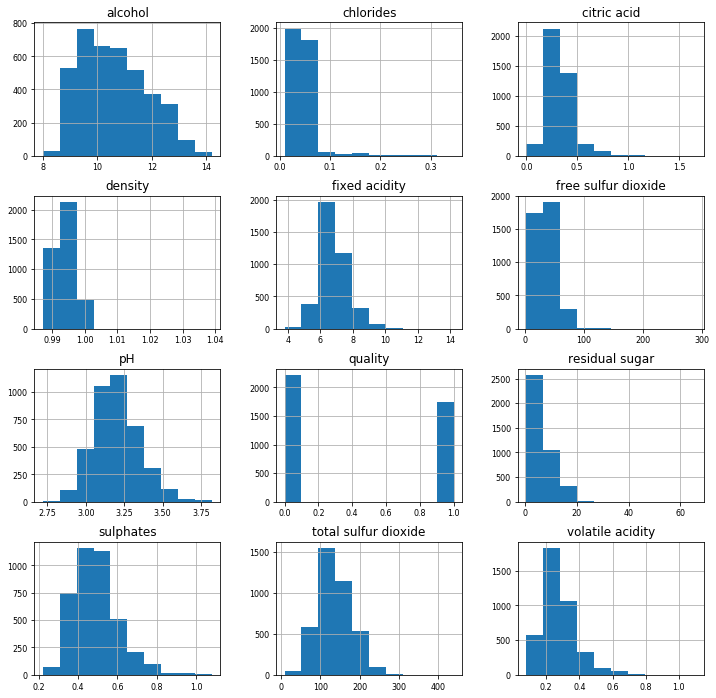

In [47]:
[x.title.set_size(12) for x in df.hist(figsize=(12, 12), xlabelsize=8, ylabelsize=8).ravel()]

#### A distribuição da quality é claramente uma binomial. As outra distribuições não são possiveis de dizer se são ou não normais por inspeção visual.

### Exercício 5

In [48]:
pd.DataFrame(dict([(col, list(stats.jarque_bera(df[col]))) for col in df.columns])).transpose().rename(columns={0: 'jb_value', 1: 'p_value'})

,jb_value,p_value
fixed acidity,1154.195925,0.0
volatile acidity,6446.805928,0.0
citric acid,8842.606940,0.0
residual sugar,6484.481708,0.0
chlorides,224093.909649,0.0
free sulfur dioxide,31322.882465,0.0
total sulfur dioxide,226.280458,0.0
density,34186.932009,0.0
pH,186.359095,0.0
sulphates,982.656647,0.0


Uma vez que os p_values do exercicio 5 são 0, é possível rejeitar a hipotese nula, daqui se pode concluir que a distribuição não é normal.

### Exercício 6

Heatmap com gradiente de cor vermelho e azul para ser mais fácil a análise da matriz de correlação

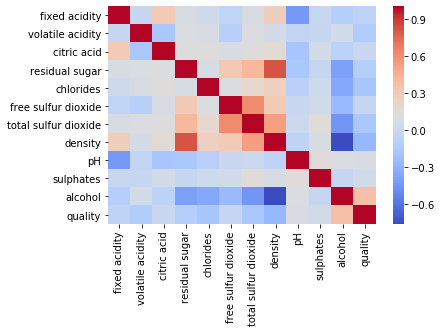

In [49]:
sns.heatmap(df.corr(), cmap="coolwarm")

### Exercício 7

Através da matriz de correlação demostrada no exercicio 6, é possivel observar pouca existencia de correlação entre as várias componentes. As componentes que demontram mais correlação são as que se aproximam mais dos valores extremos, ou seja, 1 e -1.

Como a distibuição não é normal e não existe muita correlação entre as componentes, não faz muito sentido aplicar o PCA

### Exercício 8

#### Separação das variáveis do dataframe

Variáveis independentes (onze primeiras)

In [50]:
independent_variables = df.iloc[:, :-1].values

Variável dependente (quality)

In [51]:
dependent_variable = df.iloc[:, -1].values

### Exercício 9

Normalização dos dados

In [52]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(independent_variables)

#### Aplicação do PCA

Eigenvalue

In [53]:
pca_norm = PCA(n_components=11)
pca_norm.fit(df_norm)
eigenvalues = pca_norm.explained_variance_ratio_
pd.DataFrame(eigenvalues, index=[f"PC{i + 1}" for i in range(len(eigenvalues))], columns=["eigenvalue"]).transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
eigenvalue,0.289412,0.145133,0.110277,0.094459,0.089194,0.084482,0.065641,0.054731,0.038985,0.025537,0.00215


Matriz de Loading

In [54]:
norm_pca_loadings = pd.DataFrame(pca_norm.components_.transpose(), index = df.columns[:-1], columns=[f"PC{i}" for i in range(1, df.shape[1])])
norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.152835,-0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920,0.370509,0.136228,-0.179780
volatile acidity,0.026771,0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064,-0.179983,0.233361,-0.019625
citric acid,0.151911,-0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173,-0.261001,0.050317,-0.010951
residual sugar,0.422095,0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158,0.358607,-0.072347,-0.486911
chlorides,0.211968,-0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997,0.417670,-0.052923,-0.026149
free sulfur dioxide,0.308153,0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128,0.125295,0.575552,0.031692
total sulfur dioxide,0.416806,0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100,-0.110490,-0.711630,-0.032872
density,0.512038,0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298,0.079800,0.074948,0.755219
pH,-0.114020,0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391,0.269723,0.123225,-0.146379
sulphates,0.047439,0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051,-0.009803,0.070471,-0.043031


In [55]:
var_cumsum = np.cumsum(eigenvalues)
pd.DataFrame(var_cumsum).transpose()

,0,1,2,3,4,5,6,7,8,9,10
0,0.289412,0.434546,0.544823,0.639281,0.728475,0.812957,0.878598,0.933329,0.972313,0.99785,1.0


Como se pode ver no dataframe acima representado, o conjunto das primeiras oito componentes representam 93% da variância do dataframe

In [56]:
np.argwhere(var_cumsum > 0.93)[0].item()

7

In [57]:
pca_pc8 = PCA(n_components=8)
norm_pca_data = pca_pc8.fit_transform(df_norm)

In [58]:
norm_pca_scored_df = pd.DataFrame(norm_pca_data, columns=[f"PC{i}" for i in range(1, norm_pca_data.shape[1]+1) ])

In [59]:
norm_pca_scored_df["quality"] = df["quality"]
norm_pca_scored_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,quality
0,3.862702,-0.511138,0.906204,-1.189948,0.160987,-1.203505,0.134813,-1.207956,0
1,-0.511673,0.436496,0.345879,1.057328,-0.404488,-0.764931,0.263452,0.594880,1
2,0.284474,-1.171489,0.115821,0.240730,-0.104588,-0.794319,0.443306,0.875711,0
3,1.585098,0.062778,-0.080411,-0.529644,-0.804770,0.210587,-0.240052,0.499705,0
4,0.215305,0.886144,1.277464,-0.077055,-0.249904,-0.566766,-0.796586,-0.185385,1


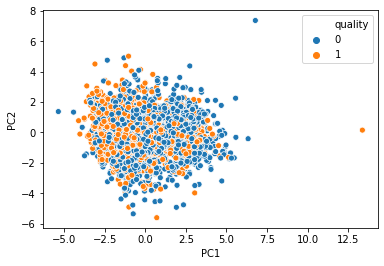

In [60]:
sns.scatterplot(data=norm_pca_scored_df, x="PC1", y="PC2", hue="quality")

/home/madruga/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/madruga/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


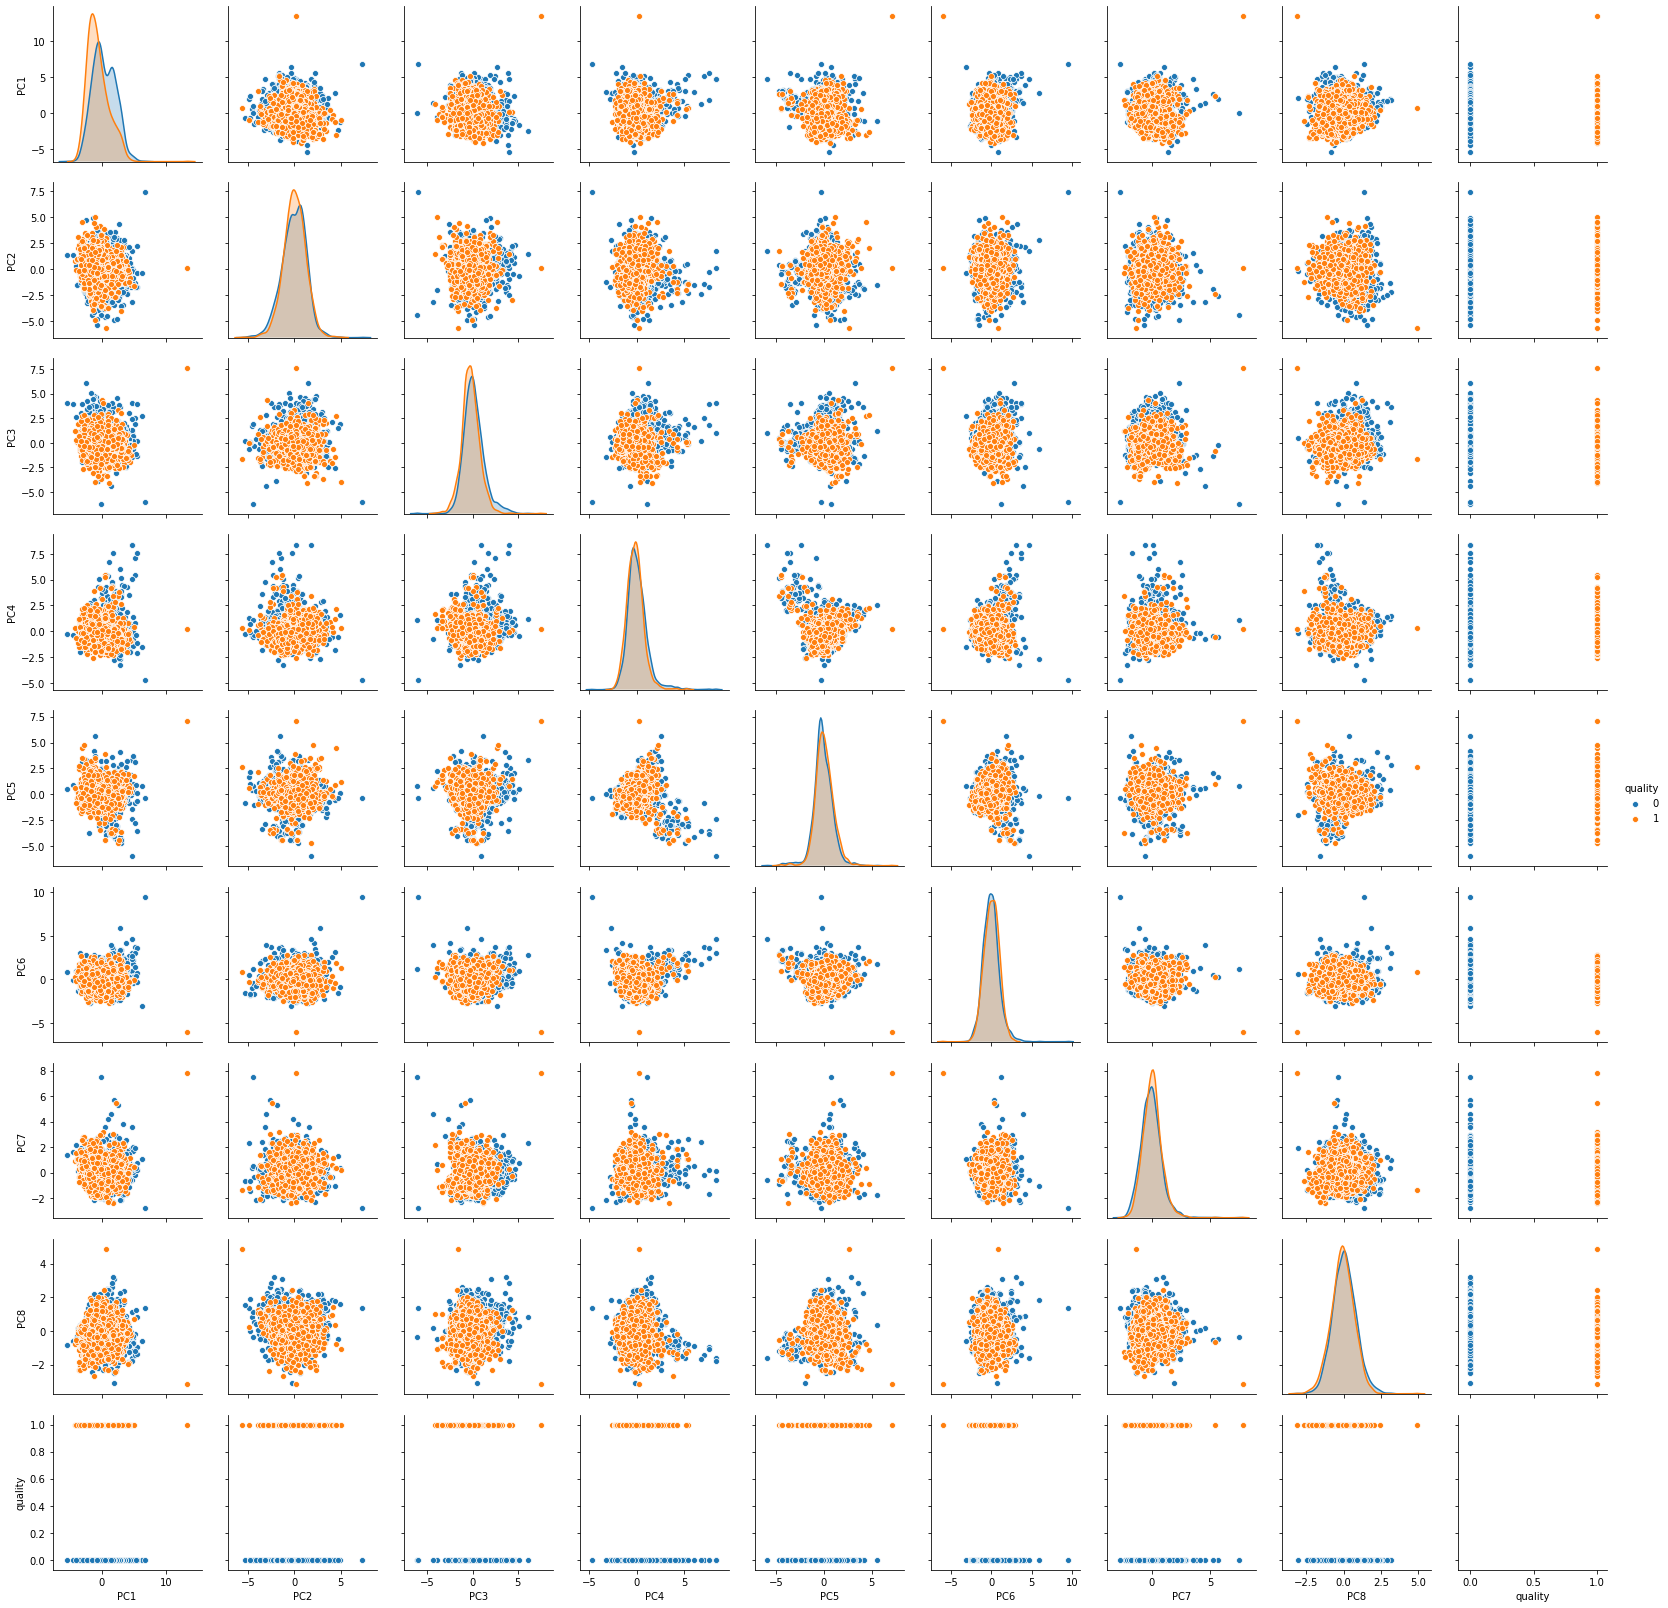

In [61]:
norm_pca_scored_df["quality"] = norm_pca_scored_df["quality"].astype('category')
sns.pairplot(norm_pca_scored_df, hue="quality")

O resultado do exercicio 9 é consistente com o do exercicio 7 uma vez que observando os gráficos gerados chega-se à conclusão que não é possivel traçar um reta que separe devidamente cada uma das componentes. Ou seja, não faz sentido aplicar o PCA.

### Exercício 10

In [62]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=0)
regressor = LinearRegression()

regressor.fit(X_train, y_train)

print(regressor.coef_)
print(regressor.intercept_)

[ 3.13574910e-02 -5.56722373e-01  5.30753127e-02  1.95381877e-02
 -5.40737952e-01  2.52405186e-03 -5.59206938e-04 -3.63028968e+01
  2.82524272e-01  2.71841768e-01  1.13439306e-01]
34.101281613314676


In [63]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
model = clf.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

[-1.50968222]
[[-0.19137695 -3.13047171  0.42962182  0.01864594 -0.48524306  0.01116689
  -0.00354839 -1.44007625 -0.86699051  1.34560604  0.64493151]]


/home/madruga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Parte II

### Exercício 1

In [64]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.25, random_state=0)

### Exercício 2

In [65]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

/home/madruga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Accuracy

In [66]:
def accuracy(df):
    return (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'N']) / (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'N'] + df.loc['Alert', 'N'] + df.loc['Non-Alert', 'P'])

### Precision

In [67]:
def precision(df):
    return df.loc['Alert', 'P'] / (df.loc['Alert', 'P'] + df.loc['Alert', 'N'])

### Recall

In [68]:
def recall(df):
    return df.loc['Alert', 'P'] / (df.loc['Non-Alert', 'P'] + df.loc['Alert', 'P'])

### MCC - Mathew Correlation Coefficent

In [69]:
def mcc(df):
    return ((df.loc['Alert', 'P'] * df.loc['Non-Alert', 'N']) - (df.loc['Alert', 'N'] * df.loc['Non-Alert', 'P'])) / math.sqrt((df.loc['Alert', 'P'] + df.loc['Alert', 'N']) * (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'P']) * (df.loc['Non-Alert', 'N'] + df.loc['Alert', 'N']) * (df.loc['Non-Alert', 'N'] + df.loc['Non-Alert', 'P']))    

### F1 Score

In [70]:
def f1_score(df):
    return (2 * (precision(df) * recall(df))) / (precision(df) + recall(df))

In [71]:
def report(cm):
    return pd.DataFrame({
        "precision": [precision(cm)],
        "accuracy":[accuracy(cm)],
        "recall": [recall(cm)],
        "mcc": [mcc(cm)],
        "f1_score": [f1_score(cm)]
    })

In [72]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index =['Alert', 'Non-Alert'], columns=["P", "N"])
cm

,P,N
Alert,440,121
Non-Alert,202,228


In [73]:
report_df = report(cm)
report_df[["precision", "recall"]]

,precision,recall
0,0.784314,0.685358


A precision corresponde à percentagem do resultado que é relevante, enquanto que, o recall diz respeito à percentagem do resultado relevante correctamente classificada pelo modelo.
Através destes resultados podemos concluir que uma grande parte dos resultados são relevantes mas que uma grande parte desses resultado (32%) está incorreta.

### Exercicio 3

In [74]:
report_df[["f1_score", "mcc"]]

,f1_score,mcc
0,0.731505,0.326377


O f1 score combina a precision e o recall enquanto o mcc tem em conta todos os elementos da matriz de confusão. Um mcc elevado significa que o modelo prevê positivos e negativos correctamente, o que não se observa neste caso.

### Exercicio 4

Tendo em conta as metricas obtidas, não é recomendado o uso deste modelo. A principal razão é o facto do valor do mcc ser extremamente baixo, tornando assim dificil confiar nos resultados do modelo.

### Bonus

In [75]:
pipeline = make_pipeline(scaler, lr)

In [76]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scorer = make_scorer(matthews_corrcoef)

In [77]:
cv_results = cross_val_score(pipeline, independent_variables, dependent_variable, cv=kf, scoring=scorer, n_jobs=-1)
pd.DataFrame(cv_results, columns=["fold"])

,fold
0,0.340712
1,0.378102
2,0.379769
3,0.388474
4,0.318428


In [78]:
print("Media")
cv_results.mean()

Media


0.36109724781521807

Uma vez que o k-fold cross validation altera a amostra para teste e a amostra de treino k vezes, é possivel concluir que o valor do mcc é bastante baixo, independentemente destas amostras. Com isto é possivel concluir com mais confiança que este classificador não é fiável.